In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import geopandas as gp
import geoplot
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns

py.init_notebook_mode(connected=True)

df = pd.read_csv("Space_Corrected.csv")

# Analisi dei lanci spaziali (1957-2020) - Progetto Data Science
Andrea Vietti - Gianluca Nogara

## Modifiche rispetto alla presentazione:
- Miglioramento mappa: [mappa dei lanci](#lanci)
- Aggiunta di un grafico: [grafico di dispersione](#grafico)

# Operazioni sul dataset

Dal momento che il dataset non è completo quanto vorremmo, andremo a fare una serie di operazioni per poter effettuare migliori operazioni.<br/><br/>
__Rimozione di colonne inutili:__ Sono presenti due colonne _(Unnamed: 0 e Unnamed: 0.1)_ che sono inutili al fine del progetto, quindi si è deciso di rimuoverle.<br/><br>
__Colonne:__<br/><br/>
1) __Country ->__ Dal momento che purtroppo non esiste un modo per capire la provenienza delle compagnie di lancio, se non dal loro nome. L'operaizone in questione non è automatizzata e quindi è stata cercata la provenienza di ogni compagnia di lancio.<br/><br/>
2) __Anno ->__ Si è deciso di trovare l'anno dei singoli lanci per poter fare degli studi in funzione del tempo.<br/><br/>
3) __Recente ->__ Per poter suddividere temporalmente si è scelto un anno per cui i lanci sono considerati recenti. La scelta è ricaduta sull'anno 2000, in modo da poter analizzare i lanci, dividendoli tra recenti e vecchi.<br/><br/>
4) __Issues ->__ Questa colonna è stata creata per generalizzare le tipologie di problemi che i lanci hanno avuto in tutte le fasi di lancio. C'è quindi la possibilità di suddividere i lanci falliti e andati a buon fine

In [22]:

#remove useless columns
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Unnamed: 0.1', inplace=True, axis=1)
#df
#check where the rocket is launched
#print(df.loc[df["Company Name"] == "name ... ", ["Location"]])
df["Country"] = "none"
df.loc[df["Company Name"]=="Arianespace", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="Eurockot", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="ESA", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="Arm??e de l'Air", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="AMBA", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="SRC", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="Yuzhmash", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="ASI", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="CNES", "Country"] = "EUROPE"
df.loc[df["Company Name"]=="CECLES", "Country"] = "EUROPE"
#
df.loc[df["Company Name"]=="SpaceX", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="US Navy", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="ULA", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="UT", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="RAE", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Northrop", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Rocket Lab", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Virgin Orbit", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="ILS", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Sandia", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="NASA", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Boeing", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Lockheed", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="EER", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Martin Marietta", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="US Air Force", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Sea Launch", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="AEB", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Starsem", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="General Dynamics", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Blue Origin", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Exos", "Country"] = "AMERICA"
df.loc[df["Company Name"]=="Douglas", "Country"] = "AMERICA"
#
df.loc[df["Company Name"]=="CASC", "Country"] = "ASIA"
df.loc[df["Company Name"]=="ExPace", "Country"] = "ASIA"
df.loc[df["Company Name"]=="JAXA", "Country"] = "ASIA"
df.loc[df["Company Name"]=="MHI", "Country"] = "ASIA"
df.loc[df["Company Name"]=="ISRO", "Country"] = "ASIA"
df.loc[df["Company Name"]=="IAI", "Country"] = "ASIA"
df.loc[df["Company Name"]=="Landspace", "Country"] = "ASIA"
df.loc[df["Company Name"]=="i-Space", "Country"] = "ASIA"
df.loc[df["Company Name"]=="OneSpace", "Country"] = "ASIA"
df.loc[df["Company Name"]=="CASIC", "Country"] = "ASIA"
df.loc[df["Company Name"]=="KCST", "Country"] = "ASIA"
df.loc[df["Company Name"]=="KARI", "Country"] = "ASIA"
df.loc[df["Company Name"]=="ISAS", "Country"] = "ASIA"
df.loc[df["Company Name"]=="ISA", "Country"] = "ASIA"
df.loc[df["Company Name"]=="IRGC", "Country"] = "ASIA"
#
df.loc[df["Company Name"]=="OKB-586", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="Roscosmos", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="VKS RF", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="Kosmotras", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="RVSN USSR", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="Khrunichev", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="MITT", "Country"] = "RUSSIA"
df.loc[df["Company Name"]=="Land Launch", "Country"] = "RUSSIA"

col = []
anno = df["Datum"].str.split()
for i in range(len(anno)):
    #dato = pd.to_datetime(anno[i][3])
    col.append(anno[i][3])
#col
df["Anno"] = col

#control if we have none Country
#print(df.loc[df["Country"] == "none", ["Country","Company Name","Location"]])
#print(df.loc[df["Country"] == "AMERICA", ["Company Name","Detail","Datum","Location"," Rocket"]])

colNuova = []
dim = df["Anno"].size
listaAnni = df["Anno"]
for i in range(dim):
    var = int(listaAnni[i])
    if(var>1999):
        colNuova.append("yes")
    else:
        colNuova.append("no")
#col
df["Recente"] = colNuova

#check if the mission got problems (all types of failures)
df["Issues"] = "yes"
df.loc[df["Status Mission"]=="Success", "Issues"] = "no"

df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Anno,Recente,Issues
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,AMERICA,2020,yes,no
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,ASIA,2020,yes,no
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,AMERICA,2020,yes,no
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUSSIA,2020,yes,no
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,AMERICA,2020,yes,no
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,AMERICA,1958,no,yes
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,EUROPE,1958,no,no
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,AMERICA,1957,no,yes
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUSSIA,1957,no,no


# Analisi dei costi
In questo capitolo andremo a studiare e analizzare i costi che sono stati fatti durante l'era spaziale, dal 1957 ad oggi.

 ## Rappresentazione grafica dei costi
 Possiamo notare differenti situazioni per ogni area geografica: <br><br>
1) __Europa ->__ In questo caso notiamo che non ci sono dati relativi a prima dell'anno 2000. Questo può essere ricondotto a una giovane storia spaziale e a una mancanza di informazioni relative ai dati sui primi lanci. Per quanto riguarda i lanci recenti possiamo notare che la spesa è abbastanza alta. <br><br>
2) __Russia ->__ Per quanto riguarda la Russia, possiamo ricordarci quanto accaduto durante la sua storia. Nonostante sia stato il primo Paese al mondo a lanciare un satellite (Sputnik 1), non ha mai avuto una grande trasparenza sui dati e ha quindi soffre di una mancanza di dati.<br>
Nel recente non ha mai avuto interesse a sviluppare nuovi sistemi di lancio, essendo la Sojuz il lanciatore più utilizzato storicamente per raggiungere la ISS. <br><br>
3) __Asia ->__ Sull'Asia c'è poco da dire,il boxplot è abbastanza chiaro. Infatti il continente ha avuto una crescita dei costi solo nel recente grazie alle potenze mondiale quali Cina e Giappone. <br><br>
4) __America ->__ Analizzando i dati del continente americano possiamo notare come i costi fossero molto elevati in passato (possiamo ricordare la campagna Apollo, i cui costi sono stati molto elevati), mentre nel presente, grazie anche a startup (quale SpaceX), il trend è quello di ridurre i costi con vettori spaziali riutilizzabili.

In [3]:
#clean issues with types
#print(df.loc[df[" Rocket"] == "5,000.0 ", ["Country","Company Name","Location"]])
#print(df.loc[df[" Rocket"] == "1,160.0 ", ["Country","Company Name","Location"]])
df.loc[df[" Rocket"] == '5,000.0 ', " Rocket"] = np.nan
df.loc[df[" Rocket"] == '1,160.0 ', " Rocket"] = np.nan
#cost per launch
df[" Rocket"] = pd.to_numeric(df[" Rocket"]) 
fig = px.box(df, x=" Rocket", y="Country", color="Recente", title="Costs for rocket (Millions of $)", 
             labels={
                 "Recente" : "After 2000",
                 " Rocket" : "Costs for rocket (Millions of $)"
             }
            )
fig.show()

 ## Andamento dei costi negli anni 
Il grafico sottostante mostra un andamento dei costi in funzione degli anni, purtroppo la rappresentazione grafica non è molto precisa per via di dati mancanti, tuttavia possiamo notare informazioni interessanti.<br>
Il trend dei costi è in salita, seppur con qualche ricaduta. Per via delle nuove tecnologie e scoperte scientifiche, il numero dei lanci andrà ad aumentare, mentre i costi rimarranno pressochè limitati.

In [4]:

fig = px.histogram(df, x="Anno", y=" Rocket", title="Costs per year in launch (Millions of $)",
                   opacity=0.8,
                   color_discrete_sequence=['indianred'],
                  barmode="stack") # color of histogram bars
labels={"Costo":"costo dei lanci","Anno":"anno"}
fig.layout["xaxis"]["title"] = "Year"
fig.layout["yaxis"]["title"] = "Costs in millions of $ for year"
fig



## Costi per aree geografiche in funzione degli anni
Come visto precedentemente possiamo constatare l'America è il principale continente per quanto riguarda il costo dei lanci.<br>
Molto interessante vedere come ogni anno non ci sia nessun continete che abbia speso quanti l'America. Da notare inoltre l'ascesa del continete Europeo e Asiatico negli ultimi 20 anni.

In [5]:
fig = px.histogram(df, x="Anno", y=" Rocket", color="Country", title="Costs per year per country", barmode="group")
fig.layout["xaxis"]["title"] = "Year"
fig.layout["yaxis"]["title"] = "Costs in millions of $ for year"
fig.layout["legend"]["title"]["text"] = "Country"
fig

# Analisi dello stato dei lanci
In questo paragrafo andremo a esaminare come sono andati i lanci per i vari continenti, analizzando il numero dei lanci nel dettaglio.

## Analisi dei problemi con i lanci
Grazie a questo istogramma possiamo comprendere quale sia il più grande lanciatore: la Russia. <br>
Tuttavia da questo grafico non si capisce con precisione da quali compagnie avvengano i lanci con il minor numero di problemi.

In [7]:
fig = px.histogram(df, orientation="h", y="Issues", color="Country", title="Issues with launches", barmode="group")
labels={"Missione":"Problemi con lancio","Zona":"Zona compagnia"}
fig.layout["xaxis"]["title"] = "Number of launches"
fig.layout["yaxis"]["title"] = "Issues"
fig.layout["legend"]["title"]["text"] = "Country"
fig

Andiamo quindi a vedere nel dettaglio...

## Rappresentazione analitica dell'esito di un lancio
I dati rappresentati sono suddivisi in vari step per poter comprendere in modo dettagliato la situazione:<br><br>
__1)__ Sono rappresentati inizalmente in una tabella di contingenza i dati in modo molto spartano, senza analisi.<br>
__2)__ In seguito grazie ad un grafico a torta possiamo visualizzare meglio l'andamento sui lanci dal punto di vista dei problemi, riportandoli anche dettagliatamente.<br>
__3)__ Siamo poi passati alla suddivisione per zone geografiche, riportando anche in questo caso i dati in modo preciso.<br>
__4)__ Abbiamo poi unito queste due informazioni per generare un grafico che le comprendesse, dando però dei risultati piuttosto illeggibili. In nostro soccorso sono giunti i dati precisi riportati sopra al grafico per poter trarre conclusioni interessanti.

In [8]:
print("Tabella di contingenza sui dati:")
df.groupby(["Issues","Country"]).size().unstack()

Tabella di contingenza sui dati:


Country,AMERICA,ASIA,EUROPE,RUSSIA
Issues,,,,
no,1237,436,317,1889
yes,173,63,26,183


Numero di problemi sui lanci totali:  Issues
no     3879
yes     445
dtype: int64

In percentuale:  Issues
no     89.708603
yes    10.291397
dtype: float64

Graficamente:


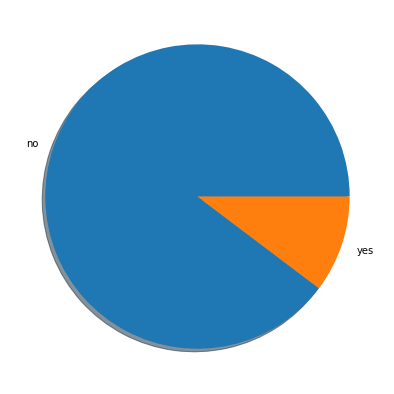

In [9]:
import pylab

print(f"Numero di problemi sui lanci totali: ", df.groupby("Issues").size())
print()
issuesRel = df.groupby("Issues").size()/df["Issues"].size
issuesRel = issuesRel * 100
print(f"In percentuale: ", issuesRel)
print()
print("Graficamente:")
test = df.groupby("Issues").size()
test.plot(kind='pie', figsize=(9, 7), shadow=True)
pylab.ylabel('')
pylab.show()

Numero di lanci totali per regione:  Country
AMERICA    1410
ASIA        499
EUROPE      343
RUSSIA     2072
dtype: int64

In percentuale:  Country
AMERICA    32.608696
ASIA       11.540241
EUROPE      7.932470
RUSSIA     47.918594
dtype: float64

Graficamente:


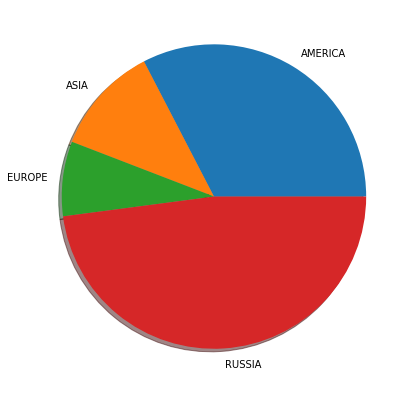

In [10]:
print(f"Numero di lanci totali per regione: ", df.groupby("Country").size())
print()
countryRel = df.groupby("Country").size()/df["Country"].size
countryRel = countryRel * 100
print(f"In percentuale: ",countryRel)
print()
print("Graficamente:")
test = df.groupby("Country").size()
test.plot(kind='pie', figsize=(9, 7), shadow=True)
pylab.ylabel('')
pylab.show()

Lanci falliti per varie regioni Issues  Country
no      AMERICA    1237
        ASIA        436
        EUROPE      317
        RUSSIA     1889
yes     AMERICA     173
        ASIA         63
        EUROPE       26
        RUSSIA      183
dtype: int64
In percentuale Issues  Country
no      AMERICA    87.730496
        ASIA       87.374749
        EUROPE     92.419825
        RUSSIA     91.167954
yes     AMERICA    12.269504
        ASIA       12.625251
        EUROPE      7.580175
        RUSSIA      8.832046
dtype: float64

Graficamente:


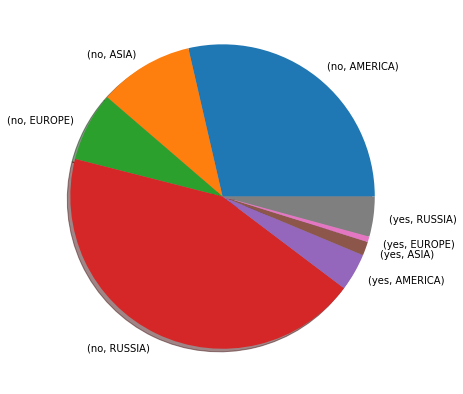

In [11]:
print(f"Lanci falliti per varie regioni",(df.groupby(["Issues","Country"]).size()))
issuesCountry = (df.groupby(["Issues","Country"]).size())/(df.groupby("Country").size())
issuesCountry = issuesCountry * 100
print(f"In percentuale", issuesCountry)
print()
print("Graficamente:")
test = df.groupby(["Issues","Country"]).size()
test.plot(kind='pie', figsize=(9, 7), shadow=True)
pylab.ylabel('')
pylab.show()

### Conclusioni
Possiamo notare come:
- Sul totale dei lanci l'89,7% non ha avuto problemi (3879 lanci su 4324)

- L'Europa è quella con la percentuale di lanci migliore (92,4%) , seguita subito dopo dalla Russia (91,2%), America (87,7%) e Asia (87,4%)

- La maggior parte dei lanci sono stati effettuati dalla Russia con circa 48% dei lanci (2072 lanci), che si spartisce la scena con l'America che vanta il 32,6% dei lanci (1410 lanci) poi abbiamo l'Asia con l'11,5% (499 lanci) e l'Europa con il 7,9% (343 lanci)
    
Dai dati si nota come Asia ed Europa non abbiano avuto storicamente grande interesse nei lanci spaziali, per America e Russia sicuramente la Guerra Fredda ha dato un'importante spinta verso lo spazio.


## Studi sui costi e l'esito dei lanci
Andando ad analizzare i lanci falliti, vediamo come il costo di questi lanci fosse più basso di quelli andati a buon fine. <br>
In particolare la distribuzione è limitata a 100 milioni di dollari, con poche eccezioni che si spingono fino a 450 milioni di dollari.<br>
Questo risultato è dato dal fatto che tantissime compagnie aeree emergenti e startup non riescano a sostenere i costi molto alti. Infatti il dataset è ricco di compagnie che hanno effettuato anche un singolo lancio.<br>
In caso di fallimento, visti gli elevati costi, molti investitori tendono a smettere di finanziare lanci, affidandosi a chi ha più esperienza.

In [14]:
px.box(df, y="Issues", x=" Rocket", title="Issues and costs", labels={
                                  " Rocket" : "Costs for rocket (Millions of $)"
             })

# Analisi dei lanci in funzione degli anni
Un breve studio per mostrare il numero dei lanci in funzione degli anni

## Rappresentazione grafrica dei lanci anno per anno
In questo grafico possiamo notare come il numero di lanci sia calato drasticamente dopo il 1960, per poi risalire agli inizi degli anni 2000, complice l'arrivo di Internet e delle tecnologie satellitari.<br>
Dopo al 2010 circa, possiamo assistire a una crisi del numero di lanci, data dal completamento della rete satellitare, che non ha più bisogno di espandersi ulteriormente.<br>
Molto interessante è che gli anni in cui c'è stato il maggior numero di lanci siano il 2006 _(117 lanci)_ e il 1959 _(119 lanci)_, due anni che non hanno nulla a che fare tra di loro. Infatti possiamo ricondurre questo gran numero di lanci a due motivi completamente differenti:
- 1959: Guerra Fredda e corsa allo spazio
- 2006: Boom della Dotcom e bisogno di satelliti

In [15]:
anno = df["Anno"].unique()
conta = df.groupby(["Anno"]).size()



# plt.plot(anno, conta, color='red', marker='o')
# plt.title('Launch per year', fontsize=14)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Launches', fontsize=14)
# plt.grid(True)
# plt.show()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=anno, y=conta, 
                    mode='lines+markers',
                    name='lines+markers'))
fig.layout["xaxis"]["title"] = "Years"
fig.layout["yaxis"]["title"] = "Number of launches"
fig.update_layout(
    title={
        'text': "Launches per year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

<a id='grafico'></a>
## Rappresentazione alternativa
Dato l'andamento dei lanci possiamo vedere che non vi è una vera e propria crescita.<br>
Trend che sicuramente andrà a modificarsi in un futuro non troppo lontano viste le grandi scoperte nel campo aerospaziale e la creazione del turismo spaziale.

In [16]:
anno = df["Anno"].unique()
x = list(map(int, anno))
conta = df.groupby(["Anno"]).size()
y = list(map(int, conta))
w_hat = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
b_hat = np.mean(y)-w_hat*np.mean(x)

x_line = np.array([np.min(x), np.max(x)])
y_line = b_hat + w_hat*x_line
data = [
    go.Scatter(x=x, y=y, mode="markers", name="data"),
    go.Scatter(x=x_line, y=y_line, mode="lines", name="regression line"),
]
layout = go.Layout(xaxis = dict(title="Years"), yaxis = dict(title="Costs in millions of $"))
py.iplot(go.Figure(data, layout))

## Rappresentazione grafrica dei lanci anno per anno e regioni
Non abbiamo grosse novità portate da questo istogramma, infatti possiamo notare alcuni dati interessanti:
- La caduta dell'URSS ha portato il tracollo dei lanci spaziali russi
- La costanza dell'America nel numero dei lanci 
- L'ascesa dell'Asia nell'ultimo ventennio
- Il basso ma costante numero di lanci effettuato dall'Europa 

In [17]:

fig = px.histogram(df, orientation="v", x="Anno", color="Country", title="Launch per country every year", barmode="group")
labels={"Anno":"Anno di lancio","Agenzia":"Tentativi di lancio"}
fig.layout["xaxis"]["title"] = "Years"
fig.layout["yaxis"]["title"] = "Launches"
fig.layout["legend"]["title"]["text"] = "Country"
fig


# Analisi grafiche sul territorio

## Filtraggio dei dati e conteggio del numero di lanci
Inizialmente si è deciso di filtrare le località, contando le località ripetute per evitare dati ridondanti che avrebbero appesantito troppo il tempo di processamento.<br>
Tramite un tool di Google _(geocoder)_ abbiamo tradotto gli indirizzi in coordinate geografiche, dividendo in latitudine e logintudine.<br>
Con questi dati è stato possibile creare un nuovo dataframe contenente:
- Latitudine
- Logintudine
- Numero di lanci

In questo modo siamo passati alla rappresentazione geografica dei dati.<br>
Purtroppo non si è stato in grado di tradurre tutti gli indirizzi in quanto dati approssimativi/segreti hanno dato come risultato della traduzione un "none".

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="gianluca.nogara@gmail.com")
set_locations = df["Location"]

location = []
latitude = []
longitude = []
number = []
coordinates = []
count = []
#Divisione in località singole e conteggio del numero di lanci effettuati
for i in range(len(set_locations)):
    if(set_locations[i] != np.NaN):
        if(not set_locations[i] in location):
            location.append(set_locations[i])
            number.append(1)
        elif(set_locations[i] in location):
            for j in range(len(location)):
               if(set_locations[i] == location[j]):
                   number[j] = number[j] + 1
                    
#Traduzione degli indirizzi in località e rimozione delle località non valide
for i in range(len(location)):         
    coordinates = geolocator.geocode(location[i])
    if(coordinates != None):
        if((not coordinates.latitude in latitude) and (not coordinates.longitude in longitude)):
            latitude.append(coordinates.latitude)
            longitude.append(coordinates.longitude)
            count.append(number[i])

#Creazione dataframe con coordinate e numero di lanci
dataf = pd.DataFrame(
    {'Latitude': latitude,
     'Longitude': longitude,
     'number' : count})



<a id='lanci'></a>
## Visualizzazione della mappa dei lanci
La mappa indica da dove sono stati effettuati i lanci.<br>
Il punto di lancio è direttamente proporzionale al numero di lanci effettuati, in questo modo spiccano le sedi più conosciute _(p.e. Cape Canaveral, Florida, USA)_, rendendo molto piccole le sedi in cui sono stati effettuati pochi lanci _(p.e. PMRF Barking Sands, Hawaii, USA)_.

In [19]:
#Inizializzazione mappa
px.set_mapbox_access_token("open-street-map")

#Inserimento dei dati dal dataframe
fig1= px.scatter_geo(dataf, lat=dataf.Latitude, lon=dataf.Longitude)
fig = px.scatter_mapbox(dataf,
                        lat=dataf.Latitude,
                        lon=dataf.Longitude,
                        mapbox_style="open-street-map",
                        size="number",
                        zoom = 1)

#Visualizzazione grafica della mappa
fig.show()